In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swiftest

In [2]:
swiftersim = swiftest.Simulation(param_file="param.swifter.in", codename="Swifter")
swiftersim.bin2xr()

Reading Swifter file param.swifter.in
Reading in time 1.000e+00
Creating Dataset
Successfully converted 1462 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
swiftestsim = swiftest.Simulation(param_file="param.swiftest.in")
swiftestsim.bin2xr()

Reading Swiftest file param.swiftest.in
Reading in time 1.001e+00
Creating Dataset
Successfully converted 1463 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestsim.ds - swiftersim.ds

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (y)'})

In [6]:
swiftdiff['dr'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['dv'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [7]:
pldiff = swiftdiff.where(np.invert(np.isnan(swiftdiff['Mass'])), drop=True)
tpdiff = swiftdiff.where(np.isnan(swiftdiff['Mass']), drop=True)

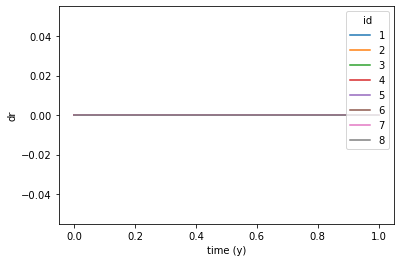

In [8]:
pldiff['dr'].plot.line(x="time (y)")
print()

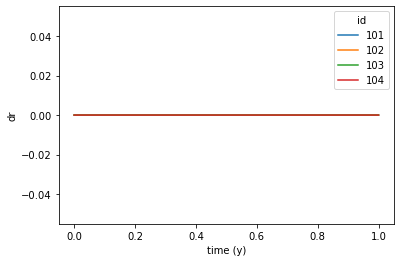

In [9]:
tpdiff['dr'].plot.line(x="time (y)")
print()

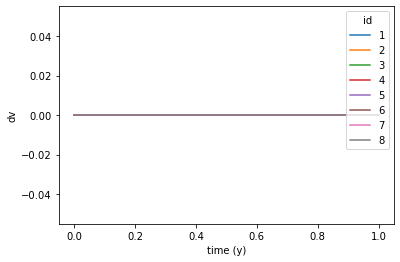

In [10]:
pldiff['dv'].plot.line(x="time (y)")
print()

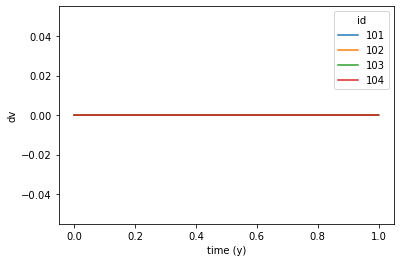

In [11]:
tpdiff['dv'].plot.line(x="time (y)")
print()